In [1]:
DATA_DIR = "../data/laks"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

import importlib
import src.laks_data

In [4]:
from src.laks_data import Laks

laks = Laks(DATA_DIR=DATA_DIR)

In [153]:
F = laks.get_cell_fractions()
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [154]:
from src.phylogeny_utils import plot_spectral_clustering

In [155]:
plot_spectral_clustering(F, filepath="../data/laks/scope/spectral_clustering.png")

# K-means Clustering

In [156]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score


ranges = range(9, 15, 1)
runs_per_k = 10

X = F.T.to_numpy()

silhouette_scores = []
all_labels = []


for k in ranges:
    print("Running K-Means with k=", k)
    for i in range(runs_per_k):
        kmeans = KMeans(n_clusters=k, random_state=i * 100)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        all_labels.append(labels)

Running K-Means with k= 9
Running K-Means with k= 10
Running K-Means with k= 11
Running K-Means with k= 12
Running K-Means with k= 13
Running K-Means with k= 14


In [157]:
sillhouettes_scores_per_k = np.array(silhouette_scores).reshape((len(ranges), runs_per_k))
best_silhouettes_for_k = np.min(sillhouettes_scores_per_k, axis=1)
best_silhouettes_for_k

array([0.6058519 , 0.58074426, 0.55583069, 0.53371578, 0.53737277,
       0.53590316])

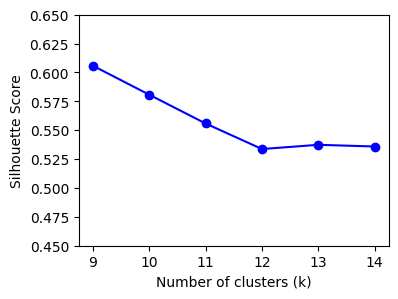

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))

plt.plot(ranges, best_silhouettes_for_k, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.ylim(0.45, 0.65)
plt.savefig("../data/laks/scope/silouette_scores.svg")

In [159]:
best_k = 12

ranges = np.array(ranges)
index_of_best_k = int(np.where(ranges == best_k)[0][0])
silhouette_scores_of_best_k = sillhouettes_scores_per_k[index_of_best_k, :]
best_label_index_of_best_best = np.argmin(silhouette_scores_of_best_k)
labels_per_k = np.array(all_labels).reshape((len(ranges), runs_per_k, -1))
best_labels = labels_per_k[index_of_best_k, best_label_index_of_best_best]

In [162]:
import pandas as pd

kmeans_labels = pd.DataFrame({
    'mutation': F.columns.to_list(),
    'clone': best_labels
})
kmeans_labels

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [163]:
# kmeans_labels.loc[kmeans_labels['clone'] == 8, 'clone'] = 2
# kmeans_labels.loc[kmeans_labels['clone'] == 11, 'clone'] = 2

In [164]:
kmeans_labels.groupby("clone")["mutation"].count()

clone
0      310
1     2406
2     1788
3     1186
4     1400
5      640
6     3133
7      685
8     1126
9      953
10     248
11     193
Name: mutation, dtype: int64

['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


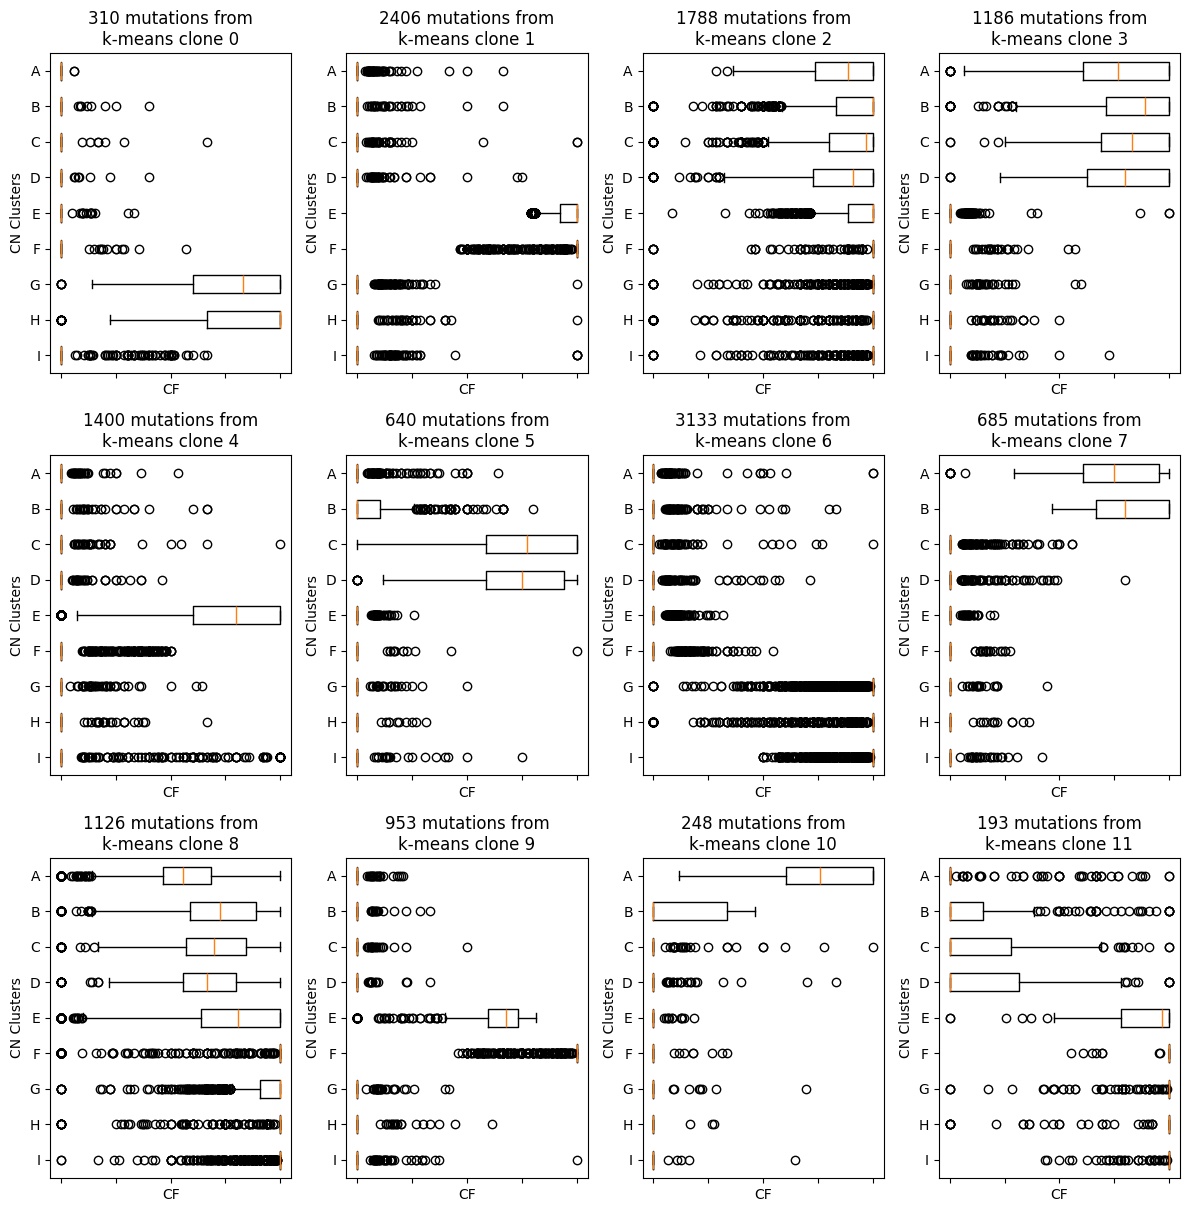

In [165]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(kmeans_labels["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 5) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = kmeans_labels[kmeans_labels["clone"] == cluster]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, tick_labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [1]:
def get_F_boundaries(F, mutation_group_mapping, thres=0.75):

    mutation_groups = sorted(mutation_group_mapping["clone"].unique())
    
    medians = np.zeros((F.shape[0], len(mutation_groups)))
    upper_percentiles = np.zeros((F.shape[0], len(mutation_groups)))
    lower_percentiles = np.zeros((F.shape[0], len(mutation_groups)))

    for i in range(len(mutation_groups)):
        mut_grp = mutation_groups[i]
        mutations_in_group = mutation_group_mapping[mutation_group_mapping["clone"] == mut_grp]["mutation"]

        df = F[mutations_in_group]
        F_clone = df.to_numpy()

        med = np.median(F_clone, axis=1)
        upp = np.percentile(F_clone, axis=1, q=int(100*thres))
        low = np.percentile(F_clone, axis=1, q=int(100*(1-thres)))

        medians[:, i] = med
        upper_percentiles[:, i] = upp
        lower_percentiles[:, i] = low
    
    F_bar = pd.DataFrame(medians, index=F.index, columns=mutation_groups)
    F_hi  = pd.DataFrame(upper_percentiles, index=F.index, columns=mutation_groups)
    F_lo  = pd.DataFrame(lower_percentiles, index=F.index, columns=mutation_groups)

    return F_bar, F_hi, F_lo


In [ ]:
F_bar, F_hi, F_lo = get_F_boundaries(F, kmeans_labels, 0.719)

In [184]:
F_bar

,0,1,2,3,4,5,6,7,8,9,10,11
clone_id,,,,,,,,,,,,
A,0.000000,0.0,0.888889,0.769231,0.0,0.00000,0.0,0.75,0.555556,0.000000,0.759615,0.000000
B,0.000000,0.0,1.000000,0.888889,0.0,0.00000,0.0,0.80,0.727273,0.000000,0.000000,0.000000
C,0.000000,0.0,0.967742,0.833333,0.0,0.77592,0.0,0.00,0.696663,0.000000,0.000000,0.000000
D,0.000000,0.0,0.909091,0.800000,0.0,0.75000,0.0,0.00,0.666667,0.000000,0.000000,0.000000
E,0.000000,1.0,1.000000,0.000000,0.8,0.00000,0.0,0.00,0.806452,0.677966,0.000000,0.967742
F,0.000000,1.0,1.000000,0.000000,0.0,0.00000,0.0,0.00,1.000000,1.000000,0.000000,1.000000
G,0.828431,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,1.000000,0.000000,0.000000,1.000000
H,1.000000,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,1.000000,0.000000,0.000000,1.000000
I,0.000000,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,1.000000,0.000000,0.000000,1.000000


In [185]:
F_hi

,0,1,2,3,4,5,6,7,8,9,10,11
clone_id,,,,,,,,,,,,
A,0.0,0.0,1.0,0.947368,0.000000,0.000000,0.0,0.909091,0.666667,0.000000,0.952381,0.000000
B,0.0,0.0,1.0,1.000000,0.000000,0.079046,0.0,0.952381,0.857143,0.000000,0.285714,0.089607
C,0.0,0.0,1.0,1.000000,0.000000,0.990000,0.0,0.000000,0.833333,0.000000,0.000000,0.117231
D,0.0,0.0,1.0,1.000000,0.000000,0.909091,0.0,0.000000,0.769231,0.000000,0.000000,0.163486
E,0.0,1.0,1.0,0.000000,0.961538,0.000000,0.0,0.000000,0.951128,0.724638,0.000000,1.000000
F,0.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000
G,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000
H,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000


In [186]:
F_lo

,0,1,2,3,4,5,6,7,8,9,10,11
clone_id,,,,,,,,,,,,
A,0.000000,0.000000,0.750000,0.625000,0.000000,0.000000,0.0,0.625000,0.476190,0.000000,0.616923,0.000000
B,0.000000,0.000000,0.857143,0.727273,0.000000,0.000000,0.0,0.666667,0.606061,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.810811,0.714286,0.000000,0.606061,0.0,0.000000,0.588235,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.750000,0.645161,0.000000,0.606061,0.0,0.000000,0.566038,0.000000,0.000000,0.000000
E,0.000000,0.943396,0.909091,0.000000,0.631579,0.000000,0.0,0.000000,0.666667,0.609756,0.000000,0.792648
F,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000
G,0.628421,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.952381,0.000000,0.000000,1.000000
H,0.727273,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000
I,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000


In [187]:
cluster_weights = kmeans_labels.groupby("clone").size().tolist()
cluster_weights

[310, 2406, 1788, 1186, 1400, 640, 3133, 685, 1126, 953, 248, 193]

In [188]:
sum(cluster_weights)

14068

In [189]:
import importlib
import src.solve_ilp_2
import src.phylogeny_utils

importlib.reload(src.solve_ilp_2)
importlib.reload(src.phylogeny_utils)

<module 'src.phylogeny_utils' from '/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py'>

In [ ]:
from src.solve_ilp_2 import solve_cncff

total_clones = F_hi.shape[1] + 1
n_clones = total_clones

while n_clones >= 1:

    solutions, value, status = solve_cncff(F_hi, F_lo, n_clones=n_clones, n_solutions=1, cluster_weights=cluster_weights, time_limit=60 * 10)

    if len(solutions) > 0:
        solutions, value, status = solve_cncff(F_hi, F_lo, n_clones=n_clones, n_solutions=100, cluster_weights=cluster_weights, time_limit=60 * 10)
        break

    n_clones -= 1


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2687964


Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Set parameter TimeLimit to value 600
Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 1
Set parameter PoolGap to value 0
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  600
PoolSolutions  1
PoolSearchMode  2
PoolGap  0

Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Optimize a model with 15407 rows, 4329 columns and 44209 nonzeros
Model fingerprint: 0x65919063
Model has 216 quadratic constraints
Variable types: 1629 continuous, 2700 integer (2700 binary)
Coefficient statistics:
  Matrix range     [8e-02, 2e+03]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [2e+01, 2e+01]
  Objective range  [2e+02, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS ra

In [144]:
len(solutions)

6

In [145]:
from src.phylogeny_utils import generate_perfect_phylogeny, draw_clone_tree, add_clusters_to_clonal_T, canonical_form

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


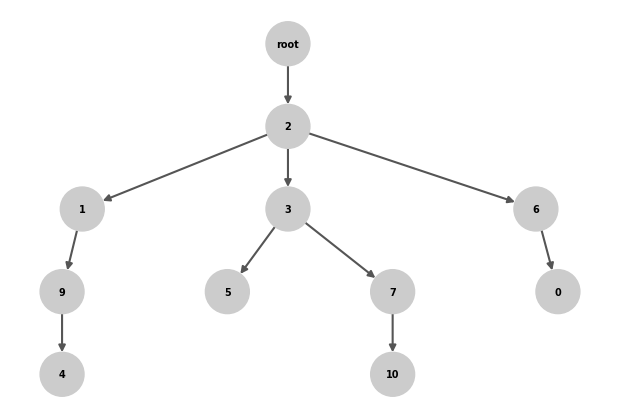

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


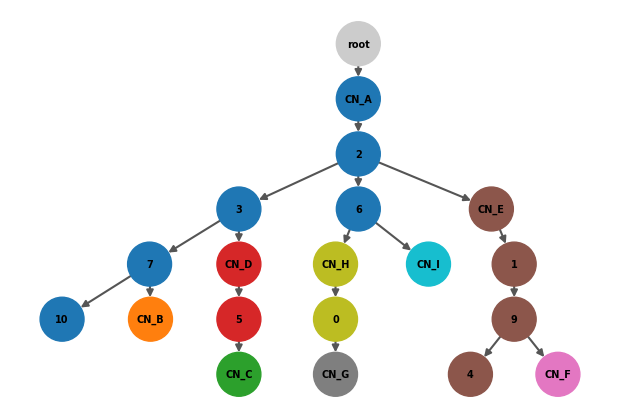

In [146]:
X, B, U, F, G = solutions[2]
solT_mut, solT_cell = generate_perfect_phylogeny(B)
draw_clone_tree(solT_mut)

fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
draw_clone_tree(fixed_T)

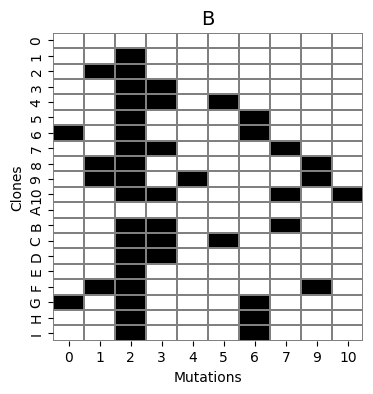

In [147]:
df_binary = B
df_binary = df_binary[df_binary.sum().sort_values(ascending=False).index]    

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
sns.heatmap(B,
            cmap=sns.color_palette(["white", "black"]),  # 0=white, 1=green
            cbar=False,
            linewidths=0.2,
            linecolor="grey")

plt.title("B", fontsize=14)
plt.xlabel("Mutations")
plt.ylabel("Clones")
plt.show()

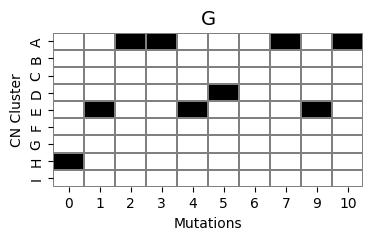

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
sns.heatmap(G,
            cmap=sns.color_palette(["white", "black"]),  # 0=white, 1=green
            cbar=False,
            linewidths=0.2,
            linecolor="grey")

plt.title("G", fontsize=14)
plt.xlabel("Mutations")
plt.ylabel("CN Cluster")
plt.show()


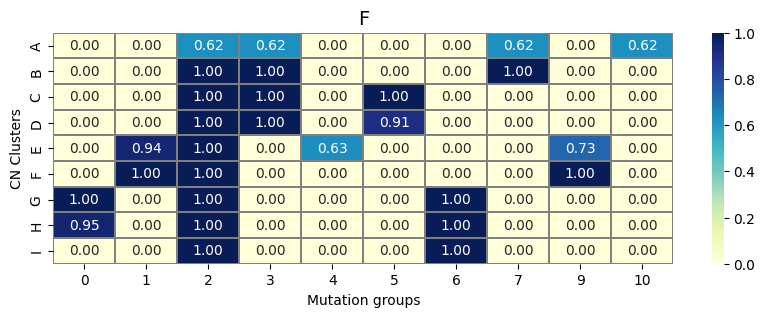

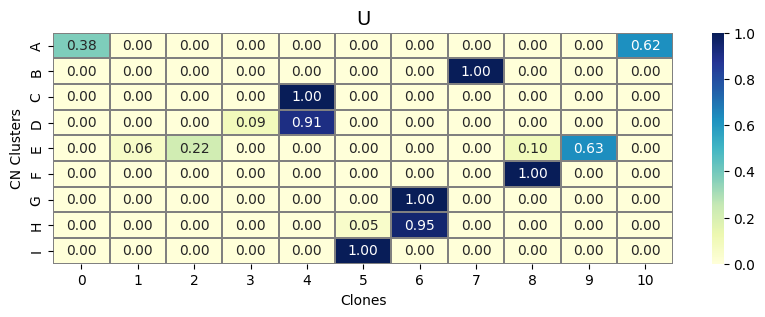

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))

sns.heatmap(F.astype(float),
            annot=True,       # print values inside
            fmt=".2f",        # format to 2 decimals
            cmap="YlGnBu",    # color map (yellow→green→blue)
            cbar=True,
            linewidths=0.2,
            linecolor="grey")

plt.title("F", fontsize=14)
plt.xlabel("Mutation groups")
plt.ylabel("CN Clusters")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))

sns.heatmap(U.astype(float),
            annot=True,       # print values inside
            fmt=".2f",        # format to 2 decimals
            cmap="YlGnBu",    # color map (yellow→green→blue)
            cbar=True,
            linewidths=0.2,
            linecolor="grey")

plt.title("U", fontsize=14)
plt.xlabel("Clones")
plt.ylabel("CN Clusters")
plt.show()


In [150]:
import os

output_prefix = "../data/laks/scope/kmeans_manual"

unique_solutions = []
solution_strs = {}

for i, solution in enumerate(solutions):
    try:
        solution_path = f"{output_prefix}/solution_{i}"
        os.makedirs(solution_path, exist_ok=True)

        X, B, U, F, G = solution
        
        X.to_csv(f"{solution_path}/X.csv")
        B.to_csv(f"{solution_path}/B.csv")
        U.to_csv(f"{solution_path}/U.csv")
        F.to_csv(f"{solution_path}/F.csv")
        G.to_csv(f"{solution_path}/G.csv")

        solT_mut, _ = generate_perfect_phylogeny(B)
        fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
        T_code = canonical_form(fixed_T)

        draw_clone_tree(fixed_T, f"{solution_path}/T.svg")

        if T_code not in solution_strs:
            print(i)
            solution_strs[T_code] = i
            unique_solutions.append(solution)
        else:
            print(i, 'same as', solution_strs[T_code])
        
    except Exception as e:
        print(e)

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0
1


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


2
3


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


4
5


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [35]:
len(unique_solutions)

26

# p-value estimation of clones in clusters

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/laks/ov2295_snv_counts.csv.gz")
df

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_9400/1233452112.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/laks/ov2295_snv_counts.csv.gz")


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [3]:
df["mutation"] = df["chrom"].astype(str) + ":" + df['coord'].astype(str) + ":" + df['ref'] + ":" +  df['alt']
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A


In [4]:
df_2 = pd.read_csv("../data/laks/ov2295_clone_clusters.csv.gz")
df = pd.merge(df, df_2, on='cell_id', how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I
...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C


In [5]:
df_cell_cn = pd.read_csv("../scratch/data/ov2295_cell_cn.csv.gz")
df_cell_cn

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6
...,...,...,...,...,...,...,...,...,...
12200991,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57000001,57500000,0,NaN,0
12200992,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57500001,58000000,0,NaN,0
12200993,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58000001,58500000,0,NaN,0
12200994,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58500001,59000000,81,NaN,0


In [6]:
binsize = int(df_cell_cn['end'][0])
binsize

500000

In [7]:
df = df.copy()
df['bin'] = df['coord'] // binsize * binsize + 1
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation,clone_id,bin
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I,19500001
...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C,62500001


In [8]:
df['chrom'] = df['chrom'].astype(str)
df = pd.merge(df, df_cell_cn, left_on=['cell_id', 'chrom', 'bin'], right_on=['cell_id', 'chr', 'start'], how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,mutation,clone_id,bin,sample_id_y,library_id,chr,start,end,reads,copy,state
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1


In [9]:
df_cell_snv = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_snv_counts.csv.gz", low_memory=False)
df_cell_snv

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [10]:
df = df_cell_snv
df["bin_start"] = df["coord"] // binsize * binsize + 1
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,bin_start
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001


In [11]:
df = pd.merge(df, df_cell_cn, left_on=['cell_id', 'chrom', 'bin_start'], right_on=['cell_id', 'chr', 'start'], how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1


In [12]:
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"] + ":" + df["alt"]
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,mutation
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A


In [13]:
df_cell_clusters = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_clone_clusters.csv.gz")
df_cell_clusters

,cell_id,clone_id
0,SA1090-A96213A-R20-C09,C
1,SA1090-A96213A-R20-C11,C
2,SA1090-A96213A-R20-C19,C
3,SA1090-A96213A-R20-C24,C
4,SA1090-A96213A-R20-C27,C
...,...,...
886,SA922-A90554B-R35-C24,F
887,SA922-A90554B-R35-C25,F
888,SA922-A90554B-R35-C37,F
889,SA922-A90554B-R35-C40,F


In [14]:
df = pd.merge(df, df_cell_clusters, on='cell_id', how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,mutation,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C


In [15]:
kmeans_labels = pd.read_csv("../data/laks/scope/kmeans_labels.csv", index_col=0)
kmeans_labels

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [16]:
df_scope = pd.merge(df, kmeans_labels, on='mutation', how='left')
df_scope

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,library_id,chr,start,end,reads,copy,state,mutation,clone_id,clone
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN,4
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H,4
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H,4
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN,4
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C,1


In [17]:
min_copy_number = df_scope['state'].min()
max_copy_number = df_scope['state'].max()

min_copy_number, max_copy_number

(np.int64(0), np.int64(11))

In [ ]:
totals_scope = {}
alts_scope = {}

In [115]:
import numpy as np


def get_alt_and_total(df, clone_labels):

    clusters = list("ABCDEFGHI")
    clones = sorted(clone_labels['clone'].unique().tolist())


    n_clusters = len(clusters)
    n_clones = len(clones)

    cluster_to_idx = {c: i for i, c in enumerate(clusters)}
    clone_to_idx = {c: i for i, c in enumerate(clones)}

    alts = np.zeros((max_copy_number + 1, n_clusters, n_clones), dtype=np.int32)
    totals = np.zeros_like(alts)

    for _, row in df.iterrows():
        state = int(row['state'])
        if 1 <= state <= max_copy_number:
            ci = cluster_to_idx.get(row['clone_id'])
            cj = clone_to_idx.get(row['clone'])
            if ci is not None and cj is not None:
                alts[state, ci, cj] += row['alt_counts']
                totals[state, ci, cj] += row['total_counts']
    
    return totals, alts


In [116]:
total_scope, alt_scope = get_alt_and_total(df_scope, kmeans_labels)

In [117]:
import sys
sys.path.append('..')

In [238]:
from src.phylogeny_utils import *

In [239]:
SCOPE_OUT_PATH = "../data/laks/scope/kmeans_065_include_3_5_7/solution_9"

In [240]:
X = pd.read_csv(f"{SCOPE_OUT_PATH}/X.csv", index_col=0)
G = pd.read_csv(f"{SCOPE_OUT_PATH}/G.csv", index_col=0)
B = pd.read_csv(f"{SCOPE_OUT_PATH}/B.csv", index_col=0)

B.columns = B.columns.astype(int)
G.columns = G.columns.astype(int)

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


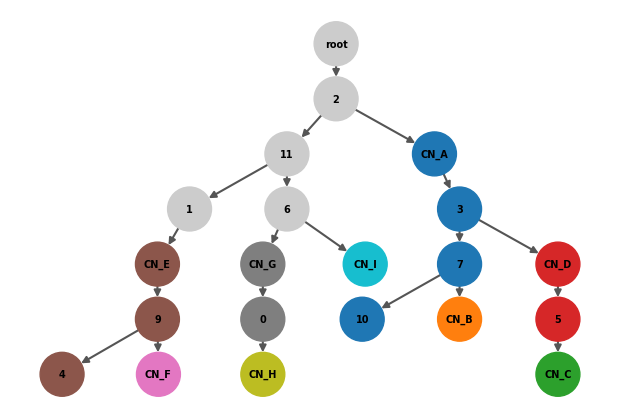

In [241]:
solT_mut, _ = generate_perfect_phylogeny(B)
fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)

draw_clone_tree(fixed_T)

In [242]:
row_cols = []
import string
for i, cluster in enumerate(string.ascii_uppercase[:9], start=1):
    for j in range(12):
        if j == 8: continue
        if nx.has_path(fixed_T, j, f"CN_{cluster}"):
            print(cluster, j)
            row_cols.append((i - 1, j))

print(row_cols)

A 2
B 2
B 3
B 7
C 2
C 3
C 5
D 2
D 3
E 1
E 2
E 11
F 1
F 2
F 9
F 11
G 2
G 6
G 11
H 0
H 2
H 6
H 11
I 2
I 6
I 11
[(0, 2), (1, 2), (1, 3), (1, 7), (2, 2), (2, 3), (2, 5), (3, 2), (3, 3), (4, 1), (4, 2), (4, 11), (5, 1), (5, 2), (5, 9), (5, 11), (6, 2), (6, 6), (6, 11), (7, 0), (7, 2), (7, 6), (7, 11), (8, 2), (8, 6), (8, 11)]


In [244]:
import seaborn as sns
import matplotlib.patches as patches
from scipy.stats import binom, betabinom


def hypothesis_test(alts, totals, dispersion_param=200, error_rate=0.01):

    pvals = np.ones_like(alts, dtype=np.float64)  # fill with 1s by default
    
    for copy_number in range(1, max_copy_number + 1):
        alt = alts[copy_number]
        total = totals[copy_number]

        # Effective success probability after accounting for error
        true_p = 1.0 / copy_number
        p_eff = true_p * (1 - error_rate)

        # Beta-binomial parameters
        ado_alpha = p_eff * dispersion_param
        ado_beta = dispersion_param * (1 - p_eff)

        # Compute p-values (vectorized)
        pvals_slice = betabinom.cdf(alt, total, ado_alpha, ado_beta)
        pvals[copy_number] = pvals_slice

    return pvals


In [245]:
pvals = hypothesis_test(alt_scope, total_scope, dispersion_param=200)

In [247]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols:
        is_rejected = pvals[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 2 	p 0.00024610404865322584 	X
Copy Number: 1 	CN: B 	Cluster: 2 	p 0.00013631897444732407 	X
Copy Number: 1 	CN: B 	Cluster: 3 	p 6.600097368479173e-07 	X
Copy Number: 1 	CN: B 	Cluster: 7 	p 3.684864630670003e-21 	X
Copy Number: 1 	CN: C 	Cluster: 2 	p 1.5223978718227462e-06 	X
Copy Number: 1 	CN: C 	Cluster: 3 	p 3.886266264696189e-07 	X
Copy Number: 1 	CN: C 	Cluster: 5 	p 1.205742256082907e-28 	X
Copy Number: 1 	CN: D 	Cluster: 2 	p 1.87433280555889e-08 	X
Copy Number: 1 	CN: D 	Cluster: 3 	p 4.680040769338123e-09 	X
Copy Number: 1 	CN: E 	Cluster: 11 	p 0.009999999999997917 	X
Copy Number: 1 	CN: F 	Cluster: 9 	p 0.0013083384396382946 	X
Copy Number: 1 	CN: G 	Cluster: 2 	p 4.7388529742796843e-07 	X
Copy Number: 1 	CN: G 	Cluster: 6 	p 4.491031315087928e-05 	X
Copy Number: 1 	CN: G 	Cluster: 11 	p 0.02955519432539616 	X
Copy Number: 1 	CN: H 	Cluster: 0 	p 2.847610000925521e-05 	X


# Run p-value for Phertilizer

In [248]:
snv_clusters = pd.read_csv("../phertilizer-outputs/laks/SNV_clusters.csv")
snv_clusters['mutation'] = snv_clusters['mutation'].str.split('_').str[1]
snv_clusters.rename(columns={'cluster': 'clone'}, inplace=True)
snv_clusters

,clone,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [249]:
df_phertilizer = pd.merge(df, snv_clusters, on='mutation', how='left')
df_phertilizer

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,library_id,chr,start,end,reads,copy,state,mutation,clone_id,clone
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN,8.0
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H,8.0
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H,8.0
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN,8.0
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D,7.0
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C,7.0
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A,7.0
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C,7.0


In [250]:
total_phertilizer, alt_phertilizer = get_alt_and_total(df_phertilizer, snv_clusters)


In [251]:
clonal_relations = [
    ('A', [0, 1, 3, 5]), 
    ('B', [0, 1, 3]), 
    ('C', [0, 1, 3]), 
    ('D', [0, 1, 3]), 
    ('E', [0, 7]), 
    ('F', [0, 7]), 
    ('G', [0, 1]), 
    ('H', [0, 1]), 
    ('I', [0, 1]), 
]

row_cols_phert = []
for cluster, clones in clonal_relations:
    for clone in clones:
        row_cols_phert.append((ord(cluster) - ord('A'), clone))

row_cols_phert

[(0, 0),
 (0, 1),
 (0, 3),
 (0, 5),
 (1, 0),
 (1, 1),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 3),
 (4, 0),
 (4, 7),
 (5, 0),
 (5, 7),
 (6, 0),
 (6, 1),
 (7, 0),
 (7, 1),
 (8, 0),
 (8, 1)]

In [252]:
pvals_phertilizer = hypothesis_test(alt_phertilizer, total_phertilizer, dispersion_param=200)

In [253]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols_phert:
        is_rejected = pvals_phertilizer[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_phertilizer[copy_number, row, col], "\tTotal Reads", total_phertilizer[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 0 	p 1.0544959765116286e-21 	Total Reads 6653 	X
Copy Number: 1 	CN: A 	Cluster: 1 	p 6.034515269289065e-32 	Total Reads 177 	X
Copy Number: 1 	CN: A 	Cluster: 3 	p 5.6458696043449374e-08 	Total Reads 2328 	X
Copy Number: 1 	CN: A 	Cluster: 5 	p 4.67547160771244e-07 	Total Reads 1757 	X
Copy Number: 1 	CN: B 	Cluster: 0 	p 1.2950329756074633e-21 	Total Reads 4978 	X
Copy Number: 1 	CN: B 	Cluster: 1 	p 2.0630357343090223e-18 	Total Reads 88 	X
Copy Number: 1 	CN: B 	Cluster: 3 	p 1.877079462163875e-07 	Total Reads 1867 	X
Copy Number: 1 	CN: C 	Cluster: 0 	p 1.6015520671159487e-21 	Total Reads 5849 	X
Copy Number: 1 	CN: C 	Cluster: 1 	p 5.56580369086615e-26 	Total Reads 121 	X
Copy Number: 1 	CN: C 	Cluster: 3 	p 4.6454498577125525e-10 	Total Reads 2210 	X
Copy Number: 1 	CN: D 	Cluster: 0 	p 7.118880033137597e-23 	Total Reads 7007 	X
Copy Number: 1 	CN: D 	Cluster: 1 	p 1.3954886732266554e-21 	Total Reads 116 	X
Copy Number: 1 	CN: D 	Cluster: 3 	p 1.8

In [254]:
import numpy as np
from scipy.stats import combine_pvalues

def combine_pvalues_across_copies(pvals, method='fisher'):
    """
    Combine p-values across copy numbers for each (cluster, clone) pair.
    pvals: 3D np.ndarray [copy_number, cluster, clone]
    Returns: 2D np.ndarray [cluster, clone] of combined p-values
    """
    max_copy_number, n_clusters, n_clones = pvals.shape[0] - 1, pvals.shape[1], pvals.shape[2]
    combined = np.ones((n_clusters, n_clones), dtype=np.float64)

    for i in range(n_clusters):
        for j in range(n_clones):
            # Extract all p-values for this cluster/clone across copy numbers
            vals = pvals[2:max_copy_number + 1, i, j]
            # Remove NaNs or invalids
            vals = vals[np.isfinite(vals)]
            if len(vals) > 0:
                _, p_combined = combine_pvalues(vals, method=method)
                combined[i, j] = p_combined
            else:
                combined[i, j] = np.nan
    return combined

In [255]:
import numpy as np
from scipy.stats import combine_pvalues

def combine_weighted_pvalues(pvals, totals, eps=1e-15):
    """
    Combine p-values across copy numbers for each cluster-clone pair using weighted Stouffer.
    
    Parameters
    ----------
    pvals : np.ndarray
        3D array [copy_number, n_clusters, n_clones] of p-values
    totals : np.ndarray
        3D array [copy_number, n_clusters, n_clones] of weights (e.g., total_counts)
    eps : float
        Small value to clip p-values away from 0 or 1 to avoid infinities
    
    Returns
    -------
    combined : np.ndarray
        2D array [n_clusters, n_clones] of combined p-values
    """
    
    n_states, n_clusters, n_clones = pvals.shape
    combined = np.ones((n_clusters, n_clones))
    
    start_copy_number = 2  # skip 0 if you’re indexing by copy_number
    
    for i in range(n_clusters):
        for j in range(n_clones):
            pvals_ij = pvals[start_copy_number:, i, j]
            weights_ij = totals[start_copy_number:, i, j]

            # Mask valid entries with finite p-values and positive weights
            mask = np.isfinite(pvals_ij) & (weights_ij > 0)
            if np.any(mask):
                # Clip p-values to avoid -inf/+inf
                pvals_safe = np.clip(pvals_ij[mask], eps, 1 - eps)
                
                # Weighted Stouffer combination
                _, p_comb = combine_pvalues(
                    pvals_safe,
                    method='stouffer',
                    weights=weights_ij[mask]
                )
                combined[i, j] = p_comb
            else:
                combined[i, j] = np.nan
    return combined


In [256]:
pvals_phertilizer_combined = combine_weighted_pvalues(pvals_phertilizer, total_phertilizer)

In [257]:
for row, col in row_cols_phert:
    is_rejected = pvals_phertilizer_combined[row, col] < 0.05
    if is_rejected:
        print("CN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_phertilizer_combined[row, col], "\tX" if is_rejected else "")

CN: A 	Cluster: 1 	p 0.04209133133144593 	X


In [258]:
pvals_scope_combined = combine_pvalues_across_copies(pvals)

In [259]:
for row, col in row_cols:
    is_rejected = pvals_scope_combined[row, col] < 0.05
    if is_rejected:
        print("CN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_scope_combined[row, col], "\tX" if is_rejected else "")

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_9400/2927289396.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(format_pval)


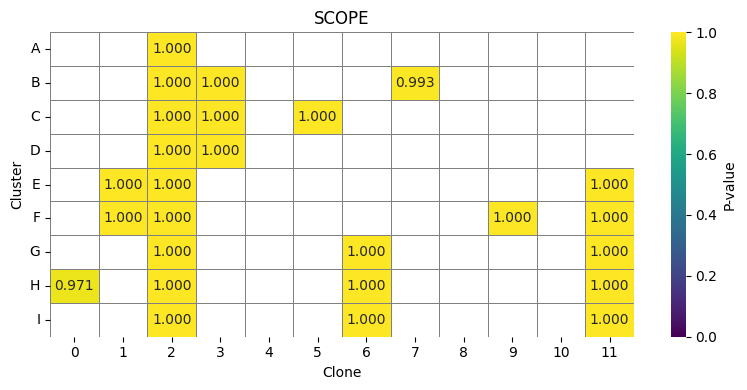

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example p-value DataFrame
df = pd.DataFrame(pvals_scope_combined, index=list("ABCDEFGHI"))

# Formatted annotations (human-readable)
def format_pval(p, threshold=0.001):
    if p < threshold:
        return f"<{threshold:.3f}"
    else:
        return f"{p:.3f}"

df_formatted = df.applymap(format_pval)

# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap='viridis',
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'P-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1
)
plt.title("SCOPE")
plt.yticks(rotation=0)
plt.xlabel("Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_9400/3103290045.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(format_pval)


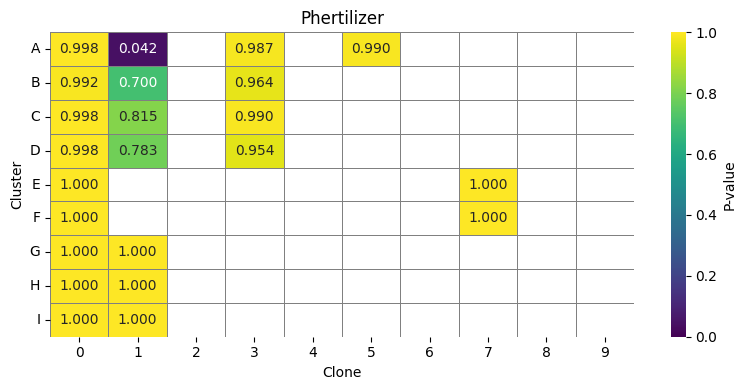

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example p-value DataFrame
df = pd.DataFrame(pvals_phertilizer_combined, index=list("ABCDEFGHI"))

# Formatted annotations (human-readable)
def format_pval(p, threshold=0.001):
    if p < threshold:
        return f"<{threshold:.3f}"
    else:
        return f"{p:.3f}"

df_formatted = df.applymap(format_pval)

# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_phert)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap='viridis',
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'P-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1
)
plt.title("Phertilizer")
plt.yticks(rotation=0)
plt.xlabel("Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()
